# Titanic Part I

On April 15, 1912, the largest passenger liner ever made collided with an iceberg during her maiden voyage. When the Titanic sank it killed 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships. One of the reasons that the shipwreck resulted in such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others.

## Data Set
The titanic.csv file contains data for 887 of the real Titanic passengers. Each row represents one person. 
The columns describe different attributes about the person including whether they survived (S), their age (A), their passenger-class (C), their sex (G) and the fare they paid (X).

#### Dataset columns:

0: Survived Indicator
1: Passenger Class
2: Name
3: Sex
4: Age
5: Siblings Aboard
6: Parents Aboard
7: Fare paid in £s

## Instruction

### Write a Python Jupyter Notebook that reads the data file and finds the answers to the following questions:

- What is the probability that a child who is in third class and is 10 years old or younger survives?
- How much did people pay to be on the ship (average)? 
- Calculate the expectation of fare conditioned on passenger-class (lowes and highest paid).
- Restate and answer the three questions with your interpretation and support analysis of it.

#### 10 points per question based on (2 points each):

- Document the import and selection of data
- Document any data transformation
- Summarize any tabular results
- Summary of you interpretation of any visual results
- Restate the question with your answer based on the analysis. 

### Submit your answers and work in a Jupyter Notebook (PDF) export or print to PDF.

In [1]:
# import
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# display the data
df = pd.DataFrame(pd.read_csv("titanic.csv"))
df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
5,0,3,Mr. James Moran,male,27.0,0,0,8.4583
6,0,1,Mr. Timothy J McCarthy,male,54.0,0,0,51.8625
7,0,3,Master. Gosta Leonard Palsson,male,2.0,3,1,21.0750
8,1,3,Mrs. Oscar W (Elisabeth Vilhelmina Berg) Johnson,female,27.0,0,2,11.1333
9,1,2,Mrs. Nicholas (Adele Achem) Nasser,female,14.0,1,0,30.0708


In [3]:
df.groupby("Survived").describe()

Pclass                                                 Age  \
          count      mean       std  min  25%  50%  75%  max  count   
Survived                                                              
0         545.0  2.528440  0.737405  1.0  2.0  3.0  3.0  3.0  545.0   
1         342.0  1.950292  0.863321  1.0  1.0  2.0  3.0  3.0  342.0   

                     ... Parents/Children Aboard        Fare             \
               mean  ...                     75%  max  count       mean   
Survived             ...                                                  
0         30.138532  ...                     0.0  6.0  545.0  22.208584   
1         28.408392  ...                     1.0  5.0  342.0  48.395408   

                                                         
                std  min      25%   50%   75%       max  
Survived                                                 
0         31.484153  0.0   7.8542  10.5  26.0  263.0000  
1         66.596998  0.0  12.4750  26.0  57.0  512.3292  

[2 rows x 40 columns]

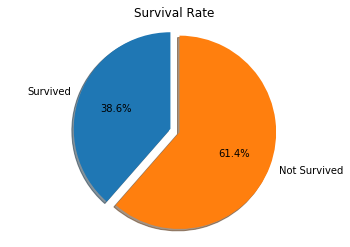

In [4]:
#initiate variables
survived = len(df[df['Survived'] == 1])
notSurvived = len(df[df['Survived'] == 0])

#create pie chart
labels = 'Survived', 'Not Survived'
fig1, ax1 = plt.subplots()
explode = (0.1, 0)
sizes = [survived, notSurvived]
ax1.pie(sizes, explode = explode, labels = labels, autopct ='%1.1f%%', shadow = True, startangle = 90)
ax1.axis('equal')
ax1.set_title("Survival Rate")
plt.show()

In [5]:
df['Sex'].value_counts()

male      573
female    314
Name: Sex, dtype: int64

Text(0.5, 1.0, 'Gender on Board')

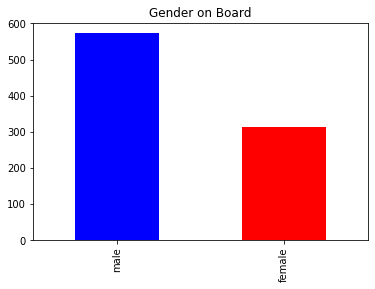

In [6]:
chart1 = df['Sex'].value_counts().plot(kind="bar", color=['b','r'])
chart1.set_title("Gender on Board")

In [7]:
df.groupby("Sex").describe()

Survived                                              Pclass            \
          count      mean       std  min  25%  50%  75%  max  count      mean   
Sex                                                                             
female    314.0  0.742038  0.438211  0.0  0.0  1.0  1.0  1.0  314.0  2.159236   
male      573.0  0.190227  0.392823  0.0  0.0  0.0  0.0  1.0  573.0  2.385689   

        ... Parents/Children Aboard        Fare                              \
        ...                     75%  max  count       mean        std   min   
Sex     ...                                                                   
female  ...                     1.0  6.0  314.0  44.479818  57.997698  6.75   
male    ...                     0.0  5.0  573.0  25.633935  43.267730  0.00   

                                            
              25%      50%   75%       max  
Sex                                         
female  12.071875  23.0000  55.0  512.3292  
male     7.895800  11.1333  27.0  512.3292  

[2 rows x 48 columns]

In [1]:
ax = sns.countplot(x="Survived", data=df)

NameError: name 'sns' is not defined

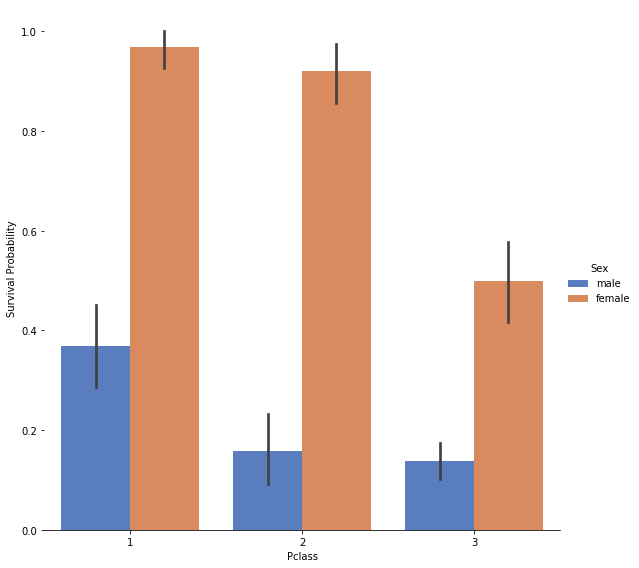

In [9]:
# Draw a nested barplot to show survival for class and sex
g = sns.catplot(x="Pclass", y="Survived", hue="Sex", data=df,
                height=8, kind="bar", palette="muted")
g.despine(left=True)
g.set_ylabels("Survival Probability")

In [10]:
df['Survived'].corr(df['Fare'])

0.25617854962896053

Out of the 887 data provided,  there are 573 males and 314 females. Female passengers paid a higher fare compared to the male passengers. There is also a higher survival probability for female compare to male. However, there is low correlation that higher fare paid leads to higher survival probability.

## What is the probability that a child who is in third class and is 10 years old or younger survives?

Based on the data, there are 53 children that is in third class and is 10 years or younger. Out of the 53 children, 22 survived. Thus, the probability of children od 10 years old or younger survives boarding on class 3 is 22/53 = 0.4151 or 41.5%.

In [11]:
# stats on survived child that is in 3rd class and is 10 years and younger.
df[(df['Pclass'] == 3) & (df['Age'] <= 10) & (df['Survived'] == 1)].describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,22.0,22.0,22.000000,22.000000,22.000000,22.000000
mean,1.0,3.0,3.678182,1.045455,1.227273,17.372909
std,0.0,0.0,2.532295,1.174218,0.528413,5.905842
min,1.0,3.0,0.420000,0.000000,0.000000,8.516700
25%,1.0,3.0,1.250000,0.000000,1.000000,12.710425
50%,1.0,3.0,4.000000,1.000000,1.000000,15.900000
75%,1.0,3.0,5.000000,1.000000,1.750000,20.208325
max,1.0,3.0,9.000000,4.000000,2.000000,31.387500


In [12]:
# stats on all children that is in 3rd class and is 10 years and younger.
df[(df['Pclass'] == 3) & (df['Age'] <= 10)].describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,53.000000,53.0,53.000000,53.000000,53.000000,53.000000
mean,0.415094,3.0,4.828679,2.471698,1.396226,25.774762
std,0.497454,0.0,2.985690,1.937522,0.531313,12.634361
min,0.000000,3.0,0.420000,0.000000,0.000000,8.516700
25%,0.000000,3.0,2.000000,1.000000,1.000000,15.900000
50%,0.000000,3.0,4.000000,3.000000,1.000000,24.150000
75%,1.000000,3.0,8.000000,4.000000,2.000000,31.275000
max,1.000000,3.0,10.000000,8.000000,2.000000,69.550000


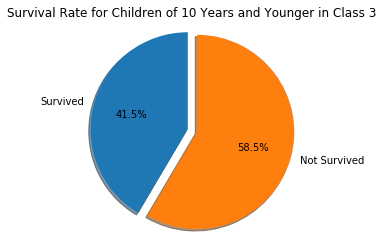

In [13]:
labels = 'Survived', 'Not Survived'
fig1, ax1 = plt.subplots()
explode = (0.1, 0)
sizes = [(22/53*100),((53-22)/53*100)]
ax1.pie(sizes, explode = explode, labels = labels, autopct ='%1.1f%%', shadow = True, startangle = 90)
ax1.axis('equal')
ax1.set_title("Survival Rate for Children of 10 Years and Younger in Class 3")
plt.show()

### How much did people pay to be on the ship (average)? 

The average fare cost 32.30 GBP. The lowest fare cost is 0.00 GBP and the highest is 512.33 GBP

In [14]:
df['Fare'].describe()

count    887.00000
mean      32.30542
std       49.78204
min        0.00000
25%        7.92500
50%       14.45420
75%       31.13750
max      512.32920
Name: Fare, dtype: float64

### Calculate the expectation of fare conditioned on passenger-class (lowest and highest paid).
The minimum fare was 0 GBP for all passenger-classes.
The highest fare is 512.33 GBP for class 1, 73.5 GBP for class 2, and 69.55 GBP for class 3.

In average, female passengers paid higher fare compared to male passengers.

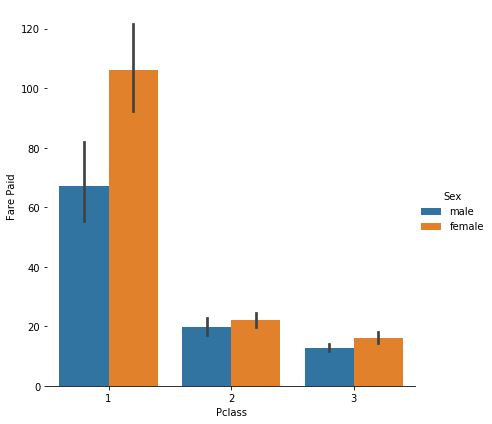

In [15]:
g = sns.catplot(x = 'Pclass', y='Fare', hue='Sex', data=df, height=6, kind='bar')
g.despine(left=True)
g.set_ylabels("Fare Paid")

In [16]:
df[['Pclass','Fare']].groupby('Pclass').describe()

Fare                                                              
        count       mean        std  min       25%      50%   75%       max
Pclass                                                                     
1       216.0  84.154687  78.380373  0.0  30.92395  60.2875  93.5  512.3292
2       184.0  20.662183  13.417399  0.0  13.00000  14.2500  26.0   73.5000
3       487.0  13.707707  11.817309  0.0   7.75000   8.0500  15.5   69.5500